In [44]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [57]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [4]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
calendar.isna().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [36]:
calendar_clean = calendar[calendar['price'].notna()]
calendar_clean.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [37]:
# Question 1. How are various factors correlated?

import seaborn as sns
df_listing_num = listings.drop(['id','scrape_id','host_id','latitude','longitude','license' ], axis=1)
df_corr = df_listing_num.corr()
df_corr

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
host_listings_count,1.000000,1.000000,0.111210,0.068226,0.065931,0.085490,-0.020224,-0.059289,0.001894,0.022684,0.119792,0.124743,0.124052,0.086038,-0.062220,-0.109357,-0.122957,-0.044087,-0.190730,-0.137222,0.024161,-0.114171,0.224222,-0.117272
host_total_listings_count,1.000000,1.000000,0.111210,0.068226,0.065931,0.085490,-0.020224,-0.059289,0.001894,0.022684,0.119792,0.124743,0.124052,0.086038,-0.062220,-0.109357,-0.122957,-0.044087,-0.190730,-0.137222,0.024161,-0.114171,0.224222,-0.117272
accommodates,0.111210,0.111210,1.000000,0.538439,0.770974,0.861119,0.439057,0.532796,0.017097,0.003291,-0.043169,-0.048761,-0.060468,-0.031535,-0.072978,-0.013101,-0.049665,0.011646,-0.019664,-0.013208,-0.037520,-0.062041,-0.029525,-0.144150
bathrooms,0.068226,0.068226,0.538439,1.000000,0.610937,0.532838,0.381094,0.304780,0.006358,-0.015322,-0.039447,-0.049399,-0.057346,-0.002326,-0.092147,0.045101,-0.006129,0.018063,-0.002939,-0.016067,-0.008959,0.014297,-0.002731,-0.167894
bedrooms,0.065931,0.065931,0.770974,0.610937,1.000000,0.753167,0.448786,0.457009,0.011957,-0.008591,-0.076559,-0.090212,-0.103121,-0.049788,-0.105555,0.023257,-0.011943,-0.008089,0.010509,0.001113,-0.028991,-0.001208,-0.045543,-0.230287
beds,0.085490,0.085490,0.861119,0.532838,0.753167,1.000000,0.312155,0.460512,0.002670,-0.009114,-0.028571,-0.036433,-0.047570,-0.009773,-0.089077,-0.000720,-0.052767,0.004732,-0.021963,-0.013373,-0.023734,-0.029102,0.010536,-0.149079
square_feet,-0.020224,-0.020224,0.439057,0.381094,0.448786,0.312155,1.000000,0.471582,0.115664,0.026643,0.058044,0.033762,0.008803,0.025856,-0.211970,0.143793,-0.024656,0.063302,0.052781,-0.021799,0.139595,0.005546,0.112333,-0.176298
guests_included,-0.059289,-0.059289,0.532796,0.304780,0.457009,0.460512,0.471582,1.000000,-0.001659,-0.018637,-0.045357,-0.046944,-0.047100,-0.048922,0.028114,-0.001430,0.003410,0.017999,0.035315,0.011658,-0.026576,-0.021561,-0.077759,-0.028903
minimum_nights,0.001894,0.001894,0.017097,0.006358,0.011957,0.002670,0.115664,-0.001659,1.000000,0.003161,0.013205,0.010290,0.009076,0.009087,-0.013818,0.001392,-0.014492,-0.032283,-0.023015,0.006334,0.013911,-0.009382,0.000512,-0.034225
maximum_nights,0.022684,0.022684,0.003291,-0.015322,-0.008591,-0.009114,0.026643,-0.018637,0.003161,1.000000,0.012254,-0.009236,-0.002945,0.007265,-0.081578,-0.031313,-0.003658,-0.006677,-0.062723,-0.034506,-0.018354,-0.024320,0.031274,-0.032458


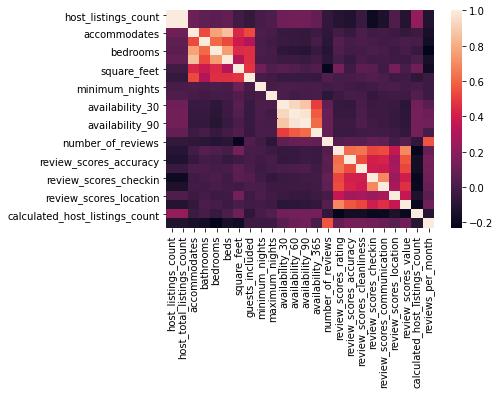

In [38]:
ax = sns.heatmap(df_corr)

In [56]:
# Question
# 2. I want tobook for my work visit, I am alone, I would need a decent apartment with wifi with high response rate and accuracy. 
# Also I would stay for 2-3 weeks long.
listings_fil = listings[(listings['accommodates']<2) & (listings['maximum_nights'] > 21) & (listings['host_response_rate'] == '100%') & (listings['review_scores_accuracy'] == 10) & 
                        (listings['review_scores_communication'] == 10)& (listings['property_type'] == 'Apartment')]
listings_fil
len(listings_fil)

# We have 11 such recommendations.

11

In [50]:
# 3. How is no of reviews affected by house pricing?
listings_prices = listings
listings_prices
listings_prices.fillna(0, inplace=True)
price = listings_prices['price']
stripped_prices=[]

#price contains comma and $ which are string, for sorting by price, we need them to be numeric
for p in price:
    p=float(p[1:].replace(',',''))
    stripped_prices.append(p)

listings_prices['price']=stripped_prices

listings_prices = listings_prices[['price','number_of_reviews']].sort_values(by = 'price')
listings_prices.plot(x='price', y = 'number_of_reviews',style = 'o',figsize =(12,8))

# Observation: The more the pricing, less might be the number of people preferring to opt, hence less number of  
# reviews for the place.

TypeError: 'float' object is not subscriptable